2019-4-4无法在UCI上搜索到皮马人糖尿病数据集，最后是在[Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1)上找到的，已经放入dataset文件夹中

# 第7章

## 读取数据

In [1]:
import pandas as pd
import os

In [2]:
filepath='datasets/'

In [3]:
file=os.listdir(filepath)
file

['diabetes.csv', 'iris.data', 'pima-indians-diabetes-database.zip']

In [4]:
data=pd.read_csv(filepath+'diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
len(data)

768

## 进行实验

### 划分特征和标签

In [7]:
import numpy as np

In [8]:
seed=7
np.random.seed(seed) #固定随机数种子，以便之后使用梯度下降时可以复现结果

In [9]:
dataset=np.loadtxt(filepath+'diabetes.csv',delimiter=',',skiprows=1)  #跳过第一行的列名，不然报错

In [10]:
X=dataset[:,0:8]
Y=dataset[:,8]  #划分特征和标签，便于训练  特征的维度为8

### 定义模型

In [11]:
import keras
from  keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


#### 构建模型

In [12]:
model=Sequential()  #序列模型，最简单的keras模型，可以使用add来添加层

In [13]:
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
# 此处注意，原文的代码 使用的参数是 'init' 但是随着keras参数更新，这里写为'kernel_initializer' 意思是权重矩阵初始化方式 采用0-1之间的均匀分布
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
# 第二层没有写输入维度，因为第一次规定的输入维度12就是第二层的输入维度，所以这层只显示说明输出维度即可
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

> 函数说明：
+ Dense参数说明 https://keras-cn.readthedocs.io/en/latest/layers/core_layer/#dense
+ kernel_initializer' 意思是权重矩阵初始化方式 采用0-0.05之间的均匀分布(0-0.05这个值的范围没有找到出处，暂存疑虑)
+ Dense(12,input_dim=8)也就是这层接受的输入为8d，输出12d（也就是本层神经元的个数）
+ 前两层的函数都是relu，（可以把值控制在0-1之间），最后一层使用S形函数，这样映射到0.5的阈值也很容易。
+ 前两个隐藏层分别有12和8个神经元（units），最后一层是1个神经元（是否有糖尿病）
+ PS注意，当时用jupyter编写sequential模型的时候，不要重复对model.add这个cell进行操作，不然会加很多重复层上去

![img](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1554989732&di=51ca7a643a806fe07bf40962c003cc6c&imgtype=jpg&er=1&src=http%3A%2F%2Fpic4.zhimg.com%2Fv2-a0b0227110882928d7aa980b1e1e9363_b.jpg)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


+ Dense层所做的操作就是 dot(W(权重),X(输入向量))+b(偏置) ,
+ 所以Dense1 8\*12+12=9\*12=108 个参数，同理，Dense2 12\*8+8=13\*8=104,Dense3 1\*8+1=9

#### 编译模型

定义好的模型可以编译:keras自动寻找相应的后端（我的电脑是TensorFlow），后端再去选择表示网络的最佳方法，配合你电脑的硬件。

训练神经网络的意义是：找到可以解决问题的最好的一组权重

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### 训练模型

In [16]:
history=model.fit(X,Y,epochs=150,batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s 530us/step - loss: 0.6771 - acc: 0.6510
Epoch 2/150
768/768 [==============================] - 0s 125us/step - loss: 0.6584 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 119us/step - loss: 0.6468 - acc: 0.6510
Epoch 4/150
768/768 [==============================] - 0s 125us/step - loss: 0.6391 - acc: 0.6510
Epoch 5/150
768/768 [==============================] - 0s 121us/step - loss: 0.6321 - acc: 0.6510
Epoch 6/150
768/768 [==============================] - 0s 122us/step - loss: 0.6181 - acc: 0.6510
Epoch 7/150
768/768 [==============================] - 0s 117us/step - loss: 0.6196 - acc: 0.6510
Epoch 8/150
768/768 [==============================] - 0s 126us/step - loss: 0.6150 - acc: 0.6510
Epoch 9/150
768/768 [==============================] - 0s 121us/step - loss: 0.6094 - acc: 0.6510
Epoch 10/150
768/768 [==============================] - 0s 125us/step - loss: 0.6158 - acc: 0.6510
Epoch 11/150
768/76

In [17]:
scores=model.evaluate(X,Y)

768/768 [==============================] - 0s 106us/step


In [18]:
scores[0],scores[1] #这两个值分别是loss和acc

(0.4826677590608597, 0.7721354166666666)

# 第8章-测试神经网络

##  自动验证

In [19]:
history2=model.fit(X,Y,epochs=150,batch_size=10,validation_split=0.33)

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 183us/step - loss: 0.5035 - acc: 0.7510 - val_loss: 0.4445 - val_acc: 0.8110
Epoch 2/150
514/514 [==============================] - 0s 142us/step - loss: 0.5144 - acc: 0.7451 - val_loss: 0.4336 - val_acc: 0.7953
Epoch 3/150
514/514 [==============================] - 0s 164us/step - loss: 0.4941 - acc: 0.7704 - val_loss: 0.4268 - val_acc: 0.8110
Epoch 4/150
514/514 [==============================] - 0s 160us/step - loss: 0.4861 - acc: 0.7840 - val_loss: 0.4357 - val_acc: 0.7913
Epoch 5/150
514/514 [==============================] - 0s 154us/step - loss: 0.4964 - acc: 0.7704 - val_loss: 0.4514 - val_acc: 0.7953
Epoch 6/150
514/514 [==============================] - 0s 167us/step - loss: 0.5014 - acc: 0.7646 - val_loss: 0.4506 - val_acc: 0.7835
Epoch 7/150
514/514 [==============================] - 0s 142us/step - loss: 0.4913 - acc: 0.7782 - val_loss: 0.4522 - val_acc: 0.7874
Epoch 8/1

514/514 [==============================] - 0s 146us/step - loss: 0.4456 - acc: 0.7840 - val_loss: 0.4872 - val_acc: 0.7677
Epoch 121/150
514/514 [==============================] - 0s 148us/step - loss: 0.4347 - acc: 0.7977 - val_loss: 0.5041 - val_acc: 0.7520
Epoch 122/150
514/514 [==============================] - 0s 160us/step - loss: 0.4418 - acc: 0.8093 - val_loss: 0.4749 - val_acc: 0.7835
Epoch 123/150
514/514 [==============================] - 0s 156us/step - loss: 0.4371 - acc: 0.7938 - val_loss: 0.4816 - val_acc: 0.7992
Epoch 124/150
514/514 [==============================] - 0s 160us/step - loss: 0.4353 - acc: 0.8074 - val_loss: 0.4799 - val_acc: 0.7835
Epoch 125/150
514/514 [==============================] - 0s 146us/step - loss: 0.4428 - acc: 0.8035 - val_loss: 0.4872 - val_acc: 0.7717
Epoch 126/150
514/514 [==============================] - 0s 150us/step - loss: 0.4496 - acc: 0.7918 - val_loss: 0.5175 - val_acc: 0.7598
Epoch 127/150
514/514 [==============================] 

## 手动验证

In [20]:
from sklearn.cross_validation import train_test_split

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

In [22]:
history3=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=150,batch_size=10)

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 173us/step - loss: 0.4695 - acc: 0.7899 - val_loss: 0.4277 - val_acc: 0.8150
Epoch 2/150
514/514 [==============================] - 0s 167us/step - loss: 0.4603 - acc: 0.7957 - val_loss: 0.4310 - val_acc: 0.8071
Epoch 3/150
514/514 [==============================] - 0s 154us/step - loss: 0.4410 - acc: 0.8074 - val_loss: 0.4127 - val_acc: 0.8268
Epoch 4/150
514/514 [==============================] - ETA: 0s - loss: 0.4059 - acc: 0.800 - ETA: 0s - loss: 0.4482 - acc: 0.791 - 0s 165us/step - loss: 0.4577 - acc: 0.7879 - val_loss: 0.4172 - val_acc: 0.8110
Epoch 5/150
514/514 [==============================] - 0s 158us/step - loss: 0.4454 - acc: 0.7957 - val_loss: 0.4459 - val_acc: 0.7795
Epoch 6/150
514/514 [==============================] - 0s 202us/step - loss: 0.4676 - acc: 0.7626 - val_loss: 0.4295 - val_acc: 0.7992
Epoch 7/150
514/514 [==============================] - 0s 164us/step

Epoch 60/150
514/514 [==============================] - 0s 175us/step - loss: 0.4196 - acc: 0.8054 - val_loss: 0.4665 - val_acc: 0.7874
Epoch 61/150
514/514 [==============================] - 0s 158us/step - loss: 0.4179 - acc: 0.8054 - val_loss: 0.4739 - val_acc: 0.7913
Epoch 62/150
514/514 [==============================] - 0s 160us/step - loss: 0.4240 - acc: 0.8054 - val_loss: 0.4578 - val_acc: 0.7795
Epoch 63/150
514/514 [==============================] - 0s 144us/step - loss: 0.4126 - acc: 0.8074 - val_loss: 0.5146 - val_acc: 0.7559
Epoch 64/150
514/514 [==============================] - 0s 148us/step - loss: 0.4348 - acc: 0.7957 - val_loss: 0.4655 - val_acc: 0.7835
Epoch 65/150
514/514 [==============================] - 0s 160us/step - loss: 0.4293 - acc: 0.7957 - val_loss: 0.4969 - val_acc: 0.7520
Epoch 66/150
514/514 [==============================] - 0s 164us/step - loss: 0.4285 - acc: 0.8054 - val_loss: 0.4508 - val_acc: 0.7992
Epoch 67/150
514/514 [==========================

Epoch 119/150
514/514 [==============================] - 0s 144us/step - loss: 0.4033 - acc: 0.8191 - val_loss: 0.4883 - val_acc: 0.7795
Epoch 120/150
514/514 [==============================] - 0s 140us/step - loss: 0.4006 - acc: 0.8132 - val_loss: 0.4898 - val_acc: 0.7717
Epoch 121/150
514/514 [==============================] - 0s 144us/step - loss: 0.4062 - acc: 0.8191 - val_loss: 0.4706 - val_acc: 0.7795
Epoch 122/150
514/514 [==============================] - 0s 146us/step - loss: 0.4169 - acc: 0.8016 - val_loss: 0.4920 - val_acc: 0.7835
Epoch 123/150
514/514 [==============================] - 0s 154us/step - loss: 0.4042 - acc: 0.8093 - val_loss: 0.4699 - val_acc: 0.7913
Epoch 124/150
514/514 [==============================] - 0s 140us/step - loss: 0.4068 - acc: 0.8132 - val_loss: 0.4804 - val_acc: 0.7717
Epoch 125/150
514/514 [==============================] - 0s 142us/step - loss: 0.4042 - acc: 0.8210 - val_loss: 0.4797 - val_acc: 0.7717
Epoch 126/150
514/514 [==================

## K折交叉验证

In [23]:
from sklearn.cross_validation import StratifiedKFold

verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录  就是上面那150个Epoch……不打印出来供人看。 verbose 信息冗余，多余的

In [24]:
kfold=StratifiedKFold(y=Y,n_folds=10,shuffle=True,random_state=seed) #7章最开始定义的 随机数种子 一直是7 
# shuffle 在分组之前对数据进行'洗牌'  继续查看函数定义，return，可以知道
# 这个函数返回的其实是Y对应的索引，(把Y的索引分成训练集和测试集)因为X和Y相互对应，知道其中一个索引，自然可以找到另一个的
CVscores=[] #cross_validation 交叉验证
for i,(train_index,test_index) in enumerate(kfold):
    modelK=Sequential()
    modelK.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
    modelK.add(Dense(8,kernel_initializer='uniform',activation='relu'))
    modelK.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    modelK.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    history4=modelK.fit(X[train_index],Y[train_index],epochs=150,batch_size=10,verbose=False)
    scores=modelK.evaluate(X[test_index],Y[test_index])
    print("%s: %.2f%%" % (modelK.metrics_names[1], scores[1]*100))  #这里后面两个%% 是为了打印出%这个符号
    CVscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(CVscores), np.std(CVscores)))

77/77 [==============================] - 0s 806us/step
acc: 79.22%
77/77 [==============================] - 0s 975us/step
acc: 72.73%
77/77 [==============================] - 0s 1ms/step
acc: 74.03%
77/77 [==============================] - 0s 1ms/step
acc: 81.82%
77/77 [==============================] - 0s 2ms/step
acc: 77.92%
77/77 [==============================] - 0s 2ms/step
acc: 67.53%
77/77 [==============================] - 0s 2ms/step
acc: 76.62%
77/77 [==============================] - 0s 2ms/step
acc: 70.13%
76/76 [==============================] - 0s 2ms/step
acc: 72.37%
76/76 [==============================] - 0s 3ms/step
acc: 73.68%
74.61% (+/- 4.10%)


注意： 这里每次循环都重新生成了模型，而不是生成一次模型，使用不同的数据喂进去训练

# 第9章  使用Scikit-Learn调用Keras的模型

## 使用scikit-learn验证深度学习模型

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.cross_validation import StratifiedKFold,cross_val_score

In [26]:
# https://keras-cn.readthedocs.io/en/latest/scikit-learn_API/ 
# 可以去查看这个类的相关说明 就知道为什么要定义一个函数来构造模型了
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model
#只是构建和编译，拟合训练是要放在验证里的
modelS=KerasClassifier(build_fn=create_model,epochs=150,batch_size=10)
kfold=StratifiedKFold(y=Y,n_folds=10,shuffle=True,random_state=seed) #返回测试集训练集划分后的索引
results=cross_val_score(modelS,X,Y,cv=kfold) 

Epoch 1/150
691/691 [==============================] - 1s 1ms/step - loss: 0.6816 - acc: 0.6512
Epoch 2/150
691/691 [==============================] - 0s 133us/step - loss: 0.6623 - acc: 0.6512
Epoch 3/150
691/691 [==============================] - 0s 133us/step - loss: 0.6546 - acc: 0.6469
Epoch 4/150
691/691 [==============================] - 0s 130us/step - loss: 0.6403 - acc: 0.6671
Epoch 5/150
691/691 [==============================] - 0s 129us/step - loss: 0.6253 - acc: 0.6758
Epoch 6/150
691/691 [==============================] - 0s 132us/step - loss: 0.6157 - acc: 0.6715
Epoch 7/150
691/691 [==============================] - 0s 129us/step - loss: 0.6105 - acc: 0.6874
Epoch 8/150
691/691 [==============================] - 0s 135us/step - loss: 0.6032 - acc: 0.6860
Epoch 9/150
691/691 [==============================] - 0s 126us/step - loss: 0.5998 - acc: 0.6802
Epoch 10/150
691/691 [==============================] - 0s 129us/step - loss: 0.5968 - acc: 0.6802
Epoch 11/150
691/691 

691/691 [==============================] - 0s 262us/step - loss: 0.5846 - acc: 0.7048
Epoch 15/150
691/691 [==============================] - 0s 210us/step - loss: 0.5951 - acc: 0.6802
Epoch 16/150
691/691 [==============================] - 0s 204us/step - loss: 0.5823 - acc: 0.6946
Epoch 17/150
691/691 [==============================] - 0s 207us/step - loss: 0.5779 - acc: 0.7106
Epoch 18/150
691/691 [==============================] - 0s 196us/step - loss: 0.5804 - acc: 0.7033
Epoch 19/150
691/691 [==============================] - 0s 261us/step - loss: 0.5757 - acc: 0.7106
Epoch 20/150
691/691 [==============================] - 0s 138us/step - loss: 0.5776 - acc: 0.7004
Epoch 21/150
691/691 [==============================] - 0s 146us/step - loss: 0.5723 - acc: 0.6975
Epoch 22/150
691/691 [==============================] - 0s 165us/step - loss: 0.5752 - acc: 0.6990
Epoch 23/150
691/691 [==============================] - 0s 162us/step - loss: 0.5747 - acc: 0.6903
Epoch 24/150
691/691 [=

691/691 [==============================] - 0s 138us/step - loss: 0.5678 - acc: 0.7265
Epoch 26/150
691/691 [==============================] - 0s 135us/step - loss: 0.5523 - acc: 0.7424
Epoch 27/150
691/691 [==============================] - 0s 127us/step - loss: 0.5532 - acc: 0.7279
Epoch 28/150
691/691 [==============================] - 0s 135us/step - loss: 0.5468 - acc: 0.7352
Epoch 29/150
691/691 [==============================] - 0s 132us/step - loss: 0.5459 - acc: 0.7308
Epoch 30/150
691/691 [==============================] - 0s 130us/step - loss: 0.5405 - acc: 0.7424
Epoch 31/150
691/691 [==============================] - 0s 130us/step - loss: 0.5409 - acc: 0.7366
Epoch 32/150
691/691 [==============================] - 0s 127us/step - loss: 0.5372 - acc: 0.7438
Epoch 33/150
691/691 [==============================] - 0s 132us/step - loss: 0.5402 - acc: 0.7236
Epoch 34/150
691/691 [==============================] - 0s 136us/step - loss: 0.5357 - acc: 0.7381
Epoch 35/150
691/691 [=

691/691 [==============================] - 0s 136us/step - loss: 0.5583 - acc: 0.7135
Epoch 40/150
691/691 [==============================] - 0s 135us/step - loss: 0.5515 - acc: 0.7164
Epoch 41/150
691/691 [==============================] - 0s 138us/step - loss: 0.5496 - acc: 0.7164
Epoch 42/150
691/691 [==============================] - 0s 138us/step - loss: 0.5451 - acc: 0.7149
Epoch 43/150
691/691 [==============================] - 0s 139us/step - loss: 0.5401 - acc: 0.7323
Epoch 44/150
691/691 [==============================] - 0s 146us/step - loss: 0.5420 - acc: 0.7294
Epoch 45/150
691/691 [==============================] - 0s 136us/step - loss: 0.5435 - acc: 0.7164
Epoch 46/150
691/691 [==============================] - 0s 139us/step - loss: 0.5457 - acc: 0.7135
Epoch 47/150
691/691 [==============================] - 0s 135us/step - loss: 0.5385 - acc: 0.7308
Epoch 48/150
691/691 [==============================] - 0s 130us/step - loss: 0.5411 - acc: 0.7236
Epoch 49/150
691/691 [=

691/691 [==============================] - 0s 148us/step - loss: 0.5392 - acc: 0.7424
Epoch 53/150
691/691 [==============================] - 0s 140us/step - loss: 0.5423 - acc: 0.7410
Epoch 54/150
691/691 [==============================] - 0s 167us/step - loss: 0.5371 - acc: 0.7221
Epoch 55/150
691/691 [==============================] - 0s 140us/step - loss: 0.5421 - acc: 0.7337
Epoch 56/150
691/691 [==============================] - 0s 198us/step - loss: 0.5337 - acc: 0.7352
Epoch 57/150
691/691 [==============================] - 0s 145us/step - loss: 0.5405 - acc: 0.7424
Epoch 58/150
691/691 [==============================] - 0s 187us/step - loss: 0.5287 - acc: 0.7525
Epoch 59/150
691/691 [==============================] - 0s 191us/step - loss: 0.5286 - acc: 0.7308
Epoch 60/150
691/691 [==============================] - 0s 164us/step - loss: 0.5346 - acc: 0.7424
Epoch 61/150
691/691 [==============================] - 0s 169us/step - loss: 0.5367 - acc: 0.7482
Epoch 62/150
691/691 [=

691/691 [==============================] - 0s 140us/step - loss: 0.5170 - acc: 0.7583
Epoch 63/150
691/691 [==============================] - 0s 140us/step - loss: 0.5130 - acc: 0.7583
Epoch 64/150
691/691 [==============================] - 0s 140us/step - loss: 0.5115 - acc: 0.7482
Epoch 65/150
691/691 [==============================] - 0s 142us/step - loss: 0.5250 - acc: 0.7540
Epoch 66/150
691/691 [==============================] - 0s 139us/step - loss: 0.5098 - acc: 0.7540
Epoch 67/150
691/691 [==============================] - 0s 139us/step - loss: 0.5134 - acc: 0.7627
Epoch 68/150
691/691 [==============================] - 0s 142us/step - loss: 0.5120 - acc: 0.7641
Epoch 69/150
691/691 [==============================] - 0s 146us/step - loss: 0.5046 - acc: 0.7771
Epoch 70/150
691/691 [==============================] - 0s 138us/step - loss: 0.5007 - acc: 0.7699
Epoch 71/150
691/691 [==============================] - 0s 142us/step - loss: 0.4985 - acc: 0.7757
Epoch 72/150
691/691 [=

691/691 [==============================] - 0s 145us/step - loss: 0.5033 - acc: 0.7612
Epoch 76/150
691/691 [==============================] - 0s 145us/step - loss: 0.5165 - acc: 0.7554
Epoch 77/150
691/691 [==============================] - 0s 142us/step - loss: 0.5013 - acc: 0.7641
Epoch 78/150
691/691 [==============================] - 0s 145us/step - loss: 0.5014 - acc: 0.7641
Epoch 79/150
691/691 [==============================] - 0s 148us/step - loss: 0.4943 - acc: 0.7656
Epoch 80/150
691/691 [==============================] - 0s 148us/step - loss: 0.4949 - acc: 0.7656
Epoch 81/150
691/691 [==============================] - 0s 143us/step - loss: 0.4980 - acc: 0.7656
Epoch 82/150
691/691 [==============================] - 0s 148us/step - loss: 0.4974 - acc: 0.7583
Epoch 83/150
691/691 [==============================] - 0s 145us/step - loss: 0.4927 - acc: 0.7728
Epoch 84/150
691/691 [==============================] - 0s 146us/step - loss: 0.4930 - acc: 0.7713
Epoch 85/150
691/691 [=

691/691 [==============================] - 0s 143us/step - loss: 0.4967 - acc: 0.7627
Epoch 87/150
691/691 [==============================] - 0s 140us/step - loss: 0.4941 - acc: 0.7627
Epoch 88/150
691/691 [==============================] - 0s 145us/step - loss: 0.4936 - acc: 0.7656
Epoch 89/150
691/691 [==============================] - 0s 143us/step - loss: 0.4996 - acc: 0.7670
Epoch 90/150
691/691 [==============================] - 0s 145us/step - loss: 0.4881 - acc: 0.7496
Epoch 91/150
691/691 [==============================] - 0s 142us/step - loss: 0.4973 - acc: 0.7525
Epoch 92/150
691/691 [==============================] - 0s 146us/step - loss: 0.4949 - acc: 0.7728
Epoch 93/150
691/691 [==============================] - 0s 140us/step - loss: 0.4997 - acc: 0.7569
Epoch 94/150
691/691 [==============================] - 0s 148us/step - loss: 0.4972 - acc: 0.7627
Epoch 95/150
691/691 [==============================] - 0s 140us/step - loss: 0.4994 - acc: 0.7612
Epoch 96/150
691/691 [=

692/692 [==============================] - 0s 143us/step - loss: 0.5012 - acc: 0.7789
Epoch 98/150
692/692 [==============================] - 0s 142us/step - loss: 0.5015 - acc: 0.7731
Epoch 99/150
692/692 [==============================] - 0s 142us/step - loss: 0.4915 - acc: 0.7847
Epoch 100/150
692/692 [==============================] - 0s 145us/step - loss: 0.4918 - acc: 0.7702
Epoch 101/150
692/692 [==============================] - 0s 142us/step - loss: 0.4885 - acc: 0.7803
Epoch 102/150
692/692 [==============================] - 0s 143us/step - loss: 0.4925 - acc: 0.7746
Epoch 103/150
692/692 [==============================] - 0s 145us/step - loss: 0.4906 - acc: 0.7746
Epoch 104/150
692/692 [==============================] - 0s 143us/step - loss: 0.5011 - acc: 0.7645
Epoch 105/150
692/692 [==============================] - 0s 143us/step - loss: 0.4890 - acc: 0.7803
Epoch 106/150
692/692 [==============================] - 0s 149us/step - loss: 0.4823 - acc: 0.7861
Epoch 107/150
69

692/692 [==============================] - 0s 142us/step - loss: 0.4917 - acc: 0.7587
Epoch 107/150
692/692 [==============================] - 0s 166us/step - loss: 0.5026 - acc: 0.7587
Epoch 108/150
692/692 [==============================] - 0s 145us/step - loss: 0.4935 - acc: 0.7659
Epoch 109/150
692/692 [==============================] - 0s 142us/step - loss: 0.4840 - acc: 0.7673
Epoch 110/150
692/692 [==============================] - 0s 179us/step - loss: 0.4862 - acc: 0.7630
Epoch 111/150
692/692 [==============================] - 0s 163us/step - loss: 0.4928 - acc: 0.7659
Epoch 112/150
692/692 [==============================] - 0s 171us/step - loss: 0.4894 - acc: 0.7789
Epoch 113/150
692/692 [==============================] - 0s 150us/step - loss: 0.4957 - acc: 0.7587
Epoch 114/150
692/692 [==============================] - 0s 140us/step - loss: 0.4834 - acc: 0.7659
Epoch 115/150
692/692 [==============================] - 0s 143us/step - loss: 0.4872 - acc: 0.7775
Epoch 116/150


In [27]:
results.mean()

0.7668489441112631

关于 cross_val_score的CV参数说明：（可以是整数，CV产生器，决定交叉验证分割的策略）

    cv : int, cross-validation generator or an iterable, optional
    Determines the cross-validation splitting strategy. Possible inputs for cv are:

    None, to use the default 3-fold cross validation,
    integer, to specify the number of folds in a (Stratified)KFold,
    CV splitter,
    An iterable yielding (train, test) splits as arrays of indices.
    For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

    Refer User Guide for the various cross-validation strategies that can be used here.

    Changed in version 0.20: cv default value if None will change from 3-fold to 5-fold in v0.22.

无非就是把人工写的for循环改成了一个函数，但是确实简单了一些，而且准确率好像还高了一点？

## 使用网格搜索调整深度学习模型的参数

In [28]:
from sklearn.grid_search import GridSearchCV

D:\anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [29]:
def create_model(optimizer='rmsprop',init='glorot_uniform'):
    model=Sequential()
    model.add(Dense(12,input_dim=8,kernel_initializer=init,activation='relu'))
    model.add(Dense(8,kernel_initializer=init,activation='relu'))
    model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model
#只是构建和编译，拟合训练是要放在验证里的
model=KerasClassifier(build_fn=create_model,verbose=False)
optimizers=['rmsprop','adam']
inits=['glorot_uniform','normal','uniform']
epoch=np.array([50,100,150])
batches=np.array([5,10,20])
param_grid=dict(optimizer=optimizers,init=inits,epochs=epoch,batch_size=batches)

grid=GridSearchCV(model,param_grid=param_grid)
#构建参数词典  2*3*3*3  不传入cv参数，使用默认的3折交叉验证,H或者也可以再使用
# kfold=StratifiedKFold(y=Y,n_folds=10,shuffle=True,random_state=seed) 把这个参数传进去，用这个来作为交叉验证的方式
grid_Results=grid.fit(X,Y)
print('Best:%f using %s'%(grid_Results.best_score_,grid_Results.best_params_))
for param,mean_score,scores in grid_Results.grid_scores_:
    print('%f(%f) with:%r'%(scores.mean(),scores.std(),param))
# %r类似于%s 用来输出字符串，但是%r保存原始的转义字符，比如\n不会表现为换行，而会直接打印出来，%r row

Best:0.755208 using {'batch_size': 20, 'epochs': 150, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.653646(0.027498) with:{'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.563802(0.158491) with:{'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.699219(0.013902) with:{'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'rmsprop'}
0.722656(0.024910) with:{'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
0.677083(0.023073) with:{'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.684896(0.036272) with:{'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'adam'}
0.661458(0.023073) with:{'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.677083(0.049650) with:{'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.720052(0.021710) with:{'batch_size': 5, 'epochs': 100, 'init': 'normal', 'optimizer': 'rmspro

可惜verbose参数只在fit方法里有，所以要传到KerasClassifier里面，不然会输出很多东西，看着很乱

我得到的最优的参数组合和原文给出的不同，但是过程是这样。

# 第13章 用序列化保存模型

In [7]:
import pandas as pd
import numpy as np

seed=7
np.random.seed(seed)

filepath='datasets/'
dataset=np.loadtxt(filepath+'diabetes.csv',delimiter=',',skiprows=1) 
X=dataset[:,0:8]
Y=dataset[:,8]

import keras
from  keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,Y,epochs=150,batch_size=10,verbose=0)
scores=model.evaluate(X,Y,verbose=0)
print(model.metrics_names[1],scores[1]*100)

acc 77.60416666666666


## 保存和读取HDF5（权重文件保存格式）及JSON（网络结构）

    model.to_json() returns a representation of the model as a JSON string. Note that the representation does not include the weights, only the architecture. You can reinstantiate the same model (with reinitialized weights) from the JSON string via:

搜索后，发现 https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [9]:
modelJson=model.to_json()  #此时还没有保存成文件，只是序列化成一个json格式的一行 
with open('model.json','w') as json_file:
    json_file.write(modelJson)
#此时才写入文件
model.save_weights('model.h5') 
model.save('modelPer.h5')

这时可以看到，同级文件下出现了model.h5和model.json以及modelPer.h5三个文件，保存成功，文件说明：

参考 https://blog.gtwang.org/programming/keras-save-and-load-model-tutorial/
+ 只保存模型的权重，使用model.save_weights('model.h5') ，载入权重时，使用model.load_weights('model.h5')
+ 只保存模型的结构，使用model.to_json() 再将json文件写入文件，
+ 保存整个模型，使用model.save('modelPer.h5')存储后，可以直接使用keras.models.load_model('modelPer.h5')来加载模型

注意： 模型权重和结构分别保存的模型，最后读取之后需要再编译一次，才可以运行

In [11]:
import keras
modelPer=keras.models.load_model('modelPer.h5')
modelPer.evaluate(X,Y,verbose=0)
print(model.metrics_names[1],scores[1]*100)  #和上面一样

acc 77.60416666666666


In [13]:
with open('model.json','r') as f:
    modelJson=f.read()
model=keras.models.model_from_json(modelJson)
model.load_weights('model.h5')

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.evaluate(X,Y,verbose=0)
print(model.metrics_names[1],scores[1]*100)  #和上面一样

acc 77.60416666666666


# 第14章 保存训练过程中性能最好的模型

## 效果变好就保存

每轮后（epochs）在测试数据集上验证，如果比之前效果好就保存权重（monitor='val_acc',mode='max'）。文件名可以以weights-improvement-val_acc=.2f.hdf5 这样的形式保存，文件名里包含一些说明词语，准确率提高等。

In [31]:
import pandas as pd
import numpy as np

seed=7
np.random.seed(seed)

filepath='datasets/'
dataset=np.loadtxt(filepath+'diabetes.csv',delimiter=',',skiprows=1) 
X=dataset[:,0:8]
Y=dataset[:,8]

import keras
from  keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

In [32]:
model=Sequential()
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

checkpoint=ModelCheckpoint(filepath='weights-Up-{epoch:02d}-{val_acc:.2f}',monitor='val_acc',
                           verbose=1,save_best_only=True,mode='max')
callback_list=[checkpoint]

model.fit(X,Y,epochs=150,batch_size=10,verbose=0,validation_split=0.33,callbacks=callback_list)


Epoch 00001: val_acc improved from -inf to 0.67323, saving model to weights-Up-01-0.67

Epoch 00002: val_acc did not improve from 0.67323

Epoch 00003: val_acc did not improve from 0.67323

Epoch 00004: val_acc did not improve from 0.67323

Epoch 00005: val_acc improved from 0.67323 to 0.70079, saving model to weights-Up-05-0.70

Epoch 00006: val_acc did not improve from 0.70079

Epoch 00007: val_acc did not improve from 0.70079

Epoch 00008: val_acc did not improve from 0.70079

Epoch 00009: val_acc improved from 0.70079 to 0.70079, saving model to weights-Up-09-0.70

Epoch 00010: val_acc did not improve from 0.70079

Epoch 00011: val_acc did not improve from 0.70079

Epoch 00012: val_acc improved from 0.70079 to 0.71260, saving model to weights-Up-12-0.71

Epoch 00013: val_acc did not improve from 0.71260

Epoch 00014: val_acc did not improve from 0.71260

Epoch 00015: val_acc did not improve from 0.71260

Epoch 00016: val_acc did not improve from 0.71260

Epoch 00017: val_acc impro


Epoch 00148: val_acc did not improve from 0.79528

Epoch 00149: val_acc did not improve from 0.79528

Epoch 00150: val_acc did not improve from 0.79528


根据 https://keras.io/zh/callbacks/#modelcheckpoint 可以知道，ModelCheckPoint中filepath。如果 filepath 是 weights.{epoch:02d}-{val_loss:.2f}.hdf5， 那么模型被保存的的文件名就会有{epoch:02d}这个模型对于的训练轮数和{val_loss:.2f}验证损失。

    filepath: 字符串，保存模型的路径。
    monitor: 被监测的数据。
    verbose: 详细信息模式，0 或者 1 。
   **save_best_only: 如果 save_best_only=True，the latest best model according to the quantity monitored will not be overwritten。从上面代码执行过程可知，依据要检测的指标得出的最新最好的模型将不会被覆盖。也就是之前训练得到的最佳模型不会被当前新出的最佳模型覆盖，都会保存，可以在当前这个.ipynb文件目录下看到保存的.hdf5文件**
   
    mode: {auto, min, max} 的其中之一。 如果 save_best_only=True，那么是否覆盖保存文件的决定就取决于被监测数据的最大或者最小值。 对于 val_acc，模式就会是 max，而对于 val_loss，模式就需要是 min，等等。 在 auto 模式中，方向会自动从被监测的数据的名字中判断出来。
  
  **save_weights_only: 如果 True，那么只有模型的权重会被保存 (model.save_weights(filepath))， 否则的话，整个模型会被保存 (model.save(filepath))。默认False，保存整个模型，所以文中写错了，读取保存的文件的时候其实是整个网络，不止是权重**
  
    period: 每个检查点之间的间隔（训练轮数）。

## 只保存最好的模型

文档里说的是，把之前的文件名改成固定的就行，那无非就是每次都保存，但是由于文件名一样，导致新的覆盖了旧的，应该不是这样的。

+ 尝试将save_best_only变成False，结果每轮模型都保存了。。。看来只能改文件名了改成一样的，但是这样就无法获取对应的轮次和准确率了。可以在verbose=1中人眼去看，对应的epochs和val_acc

In [37]:
checkpoint=ModelCheckpoint(filepath='weights-best.hdf5',monitor='val_acc',
                           verbose=1,save_best_only=True,mode='max')
model.fit(X,Y,epochs=150,batch_size=10,verbose=0,validation_split=0.33,callbacks=[checkpoint])


Epoch 00001: val_acc improved from -inf to 0.77165, saving model to weights-best.hdf5

Epoch 00002: val_acc improved from 0.77165 to 0.77559, saving model to weights-best.hdf5

Epoch 00003: val_acc did not improve from 0.77559

Epoch 00004: val_acc did not improve from 0.77559

Epoch 00005: val_acc did not improve from 0.77559

Epoch 00006: val_acc did not improve from 0.77559

Epoch 00007: val_acc did not improve from 0.77559

Epoch 00008: val_acc did not improve from 0.77559

Epoch 00009: val_acc did not improve from 0.77559

Epoch 00010: val_acc did not improve from 0.77559

Epoch 00011: val_acc did not improve from 0.77559

Epoch 00012: val_acc did not improve from 0.77559

Epoch 00013: val_acc did not improve from 0.77559

Epoch 00014: val_acc did not improve from 0.77559

Epoch 00015: val_acc did not improve from 0.77559

Epoch 00016: val_acc did not improve from 0.77559

Epoch 00017: val_acc did not improve from 0.77559

Epoch 00018: val_acc did not improve from 0.77559

Epoch 

## 导入保存的最好的模型

In [42]:
modelbest=keras.models.load_model('weights-best.hdf5') 
score=modelbest.evaluate(X,Y,verbose=0)
print('%s:%.2f%%'%(modelbest.metrics_names[1],score[1]*100))

acc:81.25%


# 第15章 模型训练效果可视化

直接用以前保存的模型来进行

In [26]:
import pandas as pd
import numpy as np

seed=7
np.random.seed(seed)

filepath='datasets/'
dataset=np.loadtxt(filepath+'diabetes.csv',delimiter=',',skiprows=1) 
X=dataset[:,0:8]
Y=dataset[:,8]

import keras
from  keras.models import Sequential
from keras.layers import Dense

modelPer=keras.models.load_model('modelPer.h5') 
history=modelPer.fit(X,Y,epochs=150,verbose=0,batch_size=10,validation_split=0.33)#如果这里加了验证集，那么history的keys中就会包含验证集的准确率和损失

# model=Sequential()
# model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
# model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
# model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# history=model.fit(X,Y,epochs=150,batch_size=10,verbose=0,validation_split=0.33)

In [27]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

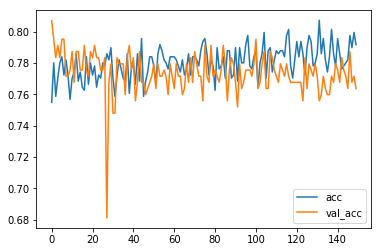

In [30]:
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend(loc='best')

可以看到，每次训练的结果都不一样，使用之前保存的模型和新建的模型跑出来的结果不同